# Olympics Tokyo 2020

<div align="center">
    <img src="https://koreus.cdn.li/media/201909/logo-jo-2020.jpg" alt="Tokyo2020_Logo.jpg" width="500"/>
</div>

___


*I welcome any feedback on my notebook. Please point out any mistakes you find.*

**What you will find in this notebook:**

- Exploratory Data Analysis
- Data visualisations

___

## Imports

In [1]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

## Dataset

This [dataset](https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/data) contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021 Tokyo Olympics.

You will also find details on the Athletes, Coaches, Teams participating as well as the entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.


In [2]:
# load the data
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))\
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df_genders = pd.read_excel(files[0])
df_teams = pd.read_excel(files[1])
df_athletes = pd.read_excel(files[2])
df_coaches = pd.read_excel(files[3])
df_medals = pd.read_excel(files[4])    

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


___
## EDA

### Genders

In [3]:
# display first rows
display(df_genders.head(10))

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [4]:
# info and stats

df_genders.info()
print('------------------------------------------')
df_genders.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Female,46.0,118.086957,147.169717,10.0,42.75,90.0,138.75,969.0
Male,46.0,127.913043,166.900746,0.0,40.25,97.5,149.75,1072.0
Total,46.0,246.000000,312.461340,19.0,85.50,190.0,288.75,2041.0


On average the genders representation seems equally distributed, with a bit more man overall across all the disciplines.

There is at least one discipline without any man.

In [5]:
# sort value
df_gender_delta = df_genders[['Discipline', 'Total', 'Male', 'Female']].sort_values(by='Total', ascending=False)
# delta male/female
df_gender_delta['gender_delta'] = df_genders['Male'] - df_genders['Female']
df_gender_delta['gender_delta_percent'] = df_gender_delta['gender_delta'] / df_genders['Total'] * 100

df_gender_delta.head()

,Discipline,Total,Male,Female,gender_delta,gender_delta_percent
4,Athletics,2041,1072,969,103,5.046546
36,Swimming,779,418,361,57,7.317073
20,Football,608,344,264,80,13.157895
29,Rowing,522,265,257,8,1.532567
24,Judo,393,201,192,9,2.290076


#### **Distribution of genders across disciplines**

In [6]:
# create cmaps
cmap_delta = colors.LinearSegmentedColormap.from_list('my_cmap', ['darkred','white','darkgreen'])
cmap_delta_percent = colors.LinearSegmentedColormap.from_list('my_cmap', [(0,'darkred'),(0.75,'white'),(1,'darkgreen')])

# show gradients
df_gender_delta.style.background_gradient(cmap='Blues', axis=0, subset=['Total']).background_gradient(cmap='Greens', axis=0, subset=['Male']).background_gradient(cmap='Reds', axis=0, subset=['Female']).background_gradient(cmap=cmap_delta, axis=0, subset=['gender_delta']).background_gradient(cmap=cmap_delta_percent, axis=0, subset=['gender_delta_percent'])

,Discipline,Total,Male,Female,gender_delta,gender_delta_percent
4,Athletics,2041,1072,969,103,5.046546
36,Swimming,779,418,361,57,7.317073
20,Football,608,344,264,80,13.157895
29,Rowing,522,265,257,8,1.532567
24,Judo,393,201,192,9,2.290076
23,Hockey,384,192,192,0,0.000000
32,Shooting,356,178,178,0,0.000000
31,Sailing,350,175,175,0,0.000000
22,Handball,336,168,168,0,0.000000
30,Rugby Sevens,297,151,146,5,1.683502


With the tabular data above, we observe:
- There are significantly more men (over 15%) in Wrestling, Boxing, Baseball, Road Cycling, and Equestrian disciplines.
- There is a slightly higher proportion of men (around 5%) in Athletics, Swimming, and Football.
- Women completely dominate Artistic Swimming and Rhythmic Gymnastics, as there are no male athletes in these disciplines.
- Athletics is the discipline with the most athletes, while Cycling BMX Freestyle has the least number of athletes.

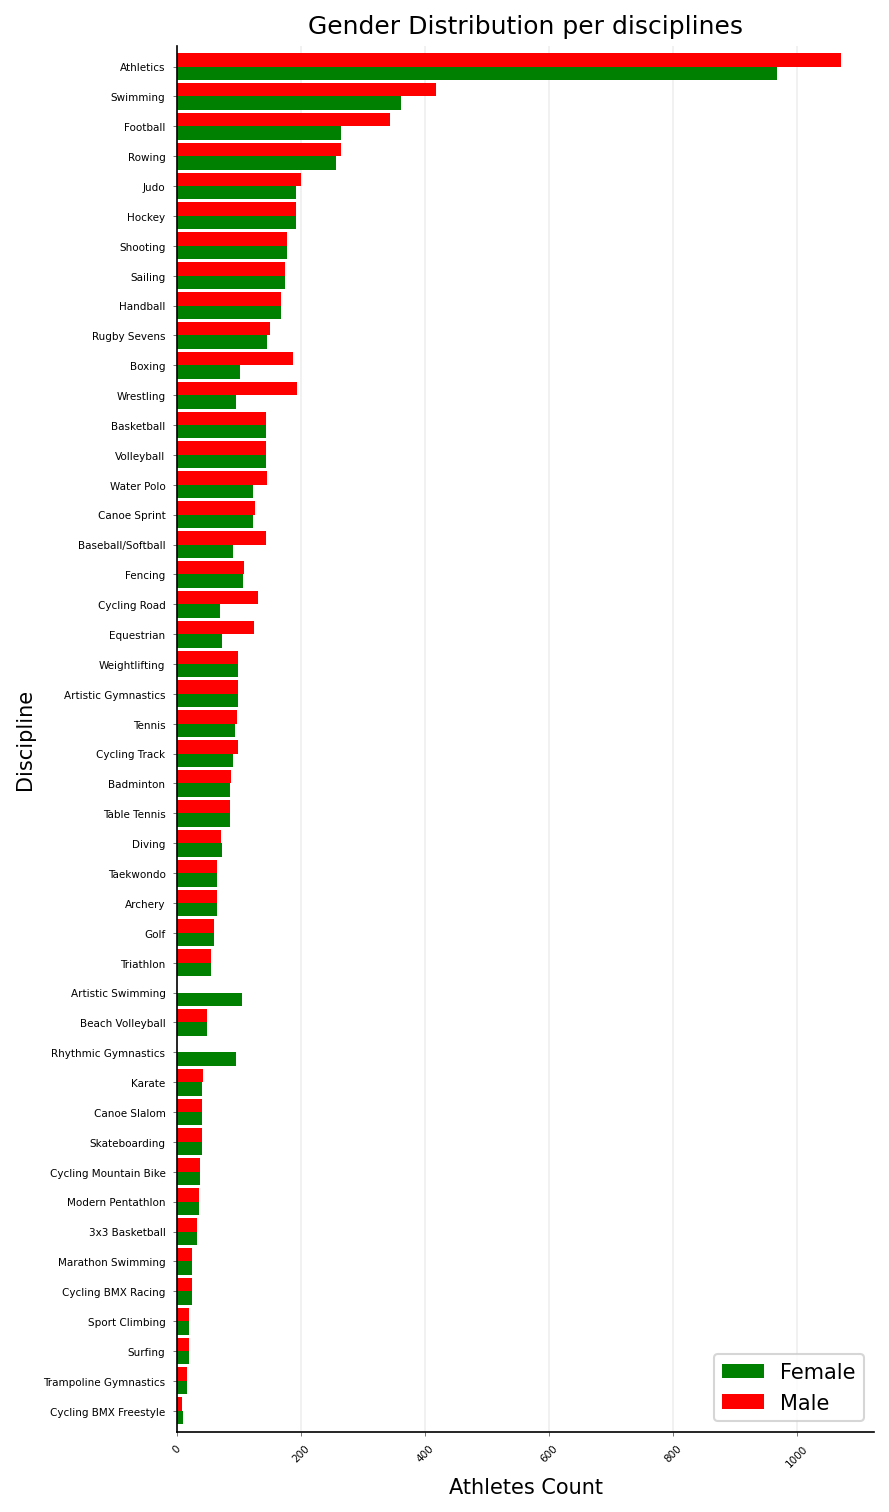

In [7]:
# gender grouped barplot by disciplines

# sort data
df_genders.sort_values(by='Total',inplace=True)

# hbar plot
plt.rcParams['figure.dpi'] = 150

fig = plt.figure(figsize=(6,12))
ax0 = fig.add_subplot()

# hbar
ax = df_genders.plot(x='Discipline',y=['Female','Male'],kind='barh',ax=ax0,zorder=2,width=0.9, color=['g', 'r'])

# removes useless axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid lines
ax.grid(which='major', alpha=0.2)
plt.grid(axis='y')

# rotate labels for better readability
plt.xticks(rotation=45)
ax.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
ax.set_xlabel('Athletes Count')
ax.set_ylabel('Discipline')
# set title and legend
plt.title('Gender Distribution per disciplines')
plt.legend(loc='best')

plt.show()

<Figure size 1280x960 with 0 Axes>

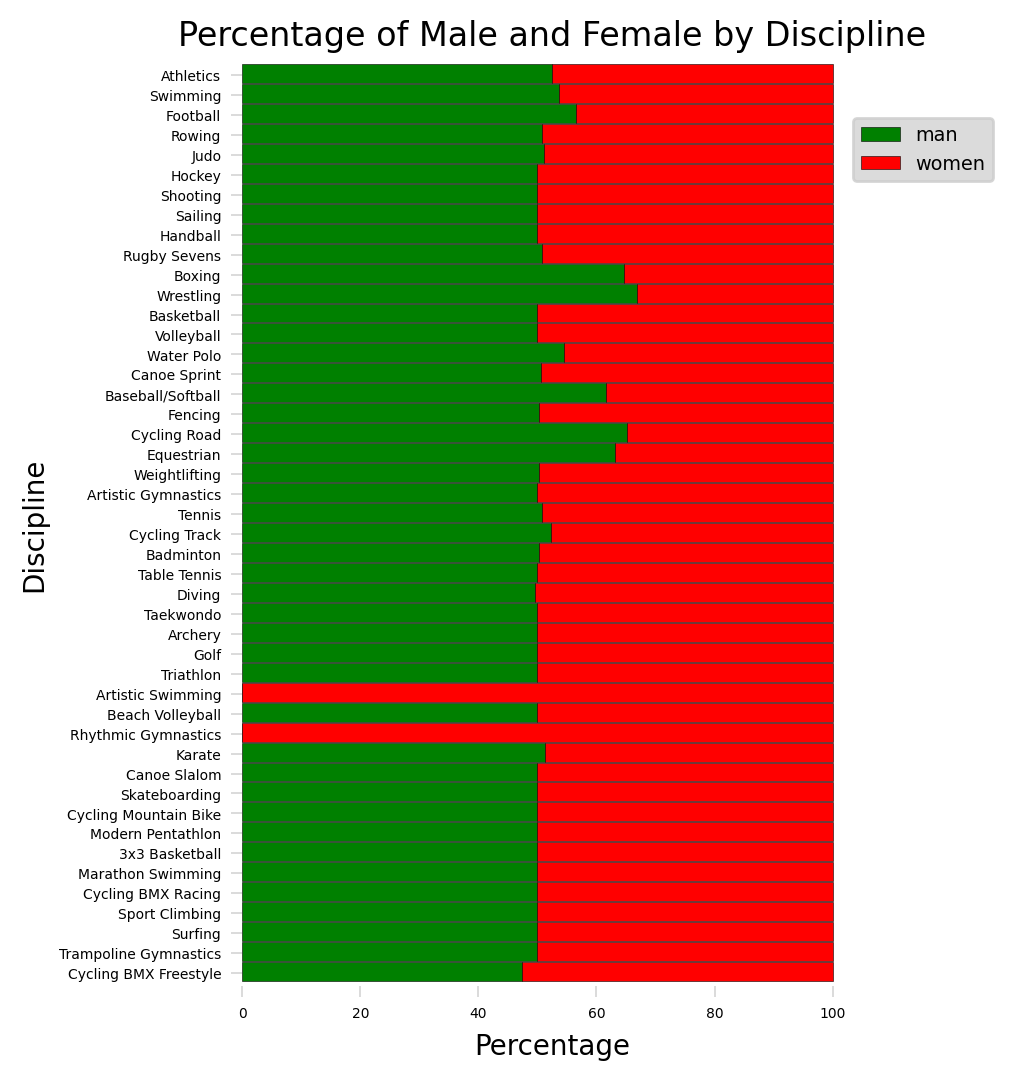

In [8]:
plt.rcParams['figure.dpi'] = 200

# horizontal percent stack chart

# Assuming your DataFrame is named 'df'
df_genders_prop = df_genders
df_genders_prop['prop_man'] = df_genders_prop['Male'] / df_genders_prop['Total'] * 100
df_genders_prop['prop_woman'] = df_genders_prop['Female'] / df_genders_prop['Total'] * 100
df_genders_prop = df_genders_prop[['Discipline', 'prop_man', 'prop_woman']]

# Set the figure size
plt.figure()
fig, ax0 = plt.subplots()

# Create the bar chart
ax = df_genders_prop.plot(x='Discipline', kind='barh', stacked=True,ax=ax0 ,width=0.8, color=['g', 'r'], figsize=(4,6))
# bar height and borders
for container in ax.containers:  
    plt.setp(container, height=0.95)
    bars = container.get_children()
    for bar in bars:
        bar.set_edgecolor('black')
        bar.set_linewidth(0.2) 

# removes useless axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize=5, width=0.1, length=4)

# add legend
plt.legend(labels=['man', 'women'], fontsize='x-small', bbox_to_anchor=(0.97, 0.95), facecolor='lightgrey')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Discipline')
plt.title('Percentage of Male and Female by Discipline')

# Show the plot
plt.show()

The overall gender distribution is well balanced.

### Teams

In [9]:
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [10]:
df_teams.info()
print('------------------------------------------')
df_teams.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
------------------------------------------


,count,unique,top,freq
Name,743,146,Japan,45
Discipline,743,20,Swimming,113
NOC,743,84,Japan,48
Event,743,36,Men,120


**What is the differences between teams Name and NOC?**

In [11]:
display(df_teams['Name'].unique())
print('------------------------------------------')
df_teams['NOC'].unique()

array(['Belgium', 'China', 'France', 'Italy', 'Japan', 'Latvia',
       'Mongolia', 'Netherlands', 'Poland', 'ROC', 'Romania', 'Serbia',
       'United States', 'Australia', 'Bangladesh', 'Belarus', 'Brazil',
       'Canada', 'Chinese Taipei', 'Colombia', 'Egypt', 'Germany',
       'Great Britain', 'India', 'Indonesia', 'Kazakhstan', 'Malaysia',
       'Mexico', 'Rep. of Moldova', 'Republic of Korea', 'Spain',
       'Tunisia', 'Turkey', 'Ukraine', 'Vietnam', 'Korea', 'Switzerland',
       'Austria', 'Greece', 'Israel', 'Liechtenstein', 'South Africa',
       'Bahamas', 'Botswana', 'Cuba', 'Czech Republic', 'Denmark',
       'Dominican Rep.', 'Ecuador', 'Ghana', 'Ireland', 'Jamaica',
       'Nigeria', 'Trinidad & Tobago', 'Argentina',
       'Islamic Rep. of Iran', 'Puerto Rico', 'Slovenia',
       'Azaad/Capogrosso', 'Gallay/Pereyra', 'McHugh/Schumann',
       'Artacho Del Solar/Clancy', 'Alison/Alvaro Filho',
       'Evandro/Bruno Schmidt', 'Ana Patricia/Rebecca', 'Agatha/Duda',
    

------------------------------------------


array(['Belgium', "People's Republic of China", 'France', 'Italy',
       'Japan', 'Latvia', 'Mongolia', 'Netherlands', 'Poland', 'ROC',
       'Romania', 'Serbia', 'United States of America', 'Australia',
       'Bangladesh', 'Belarus', 'Brazil', 'Canada', 'Chinese Taipei',
       'Colombia', 'Egypt', 'Germany', 'Great Britain', 'India',
       'Indonesia', 'Kazakhstan', 'Malaysia', 'Mexico',
       'Republic of Moldova', 'Republic of Korea', 'Spain', 'Tunisia',
       'Turkey', 'Ukraine', 'Vietnam', 'Switzerland', 'Austria', 'Greece',
       'Israel', 'Liechtenstein', 'South Africa', 'Bahamas', 'Botswana',
       'Cuba', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Ghana', 'Ireland', 'Jamaica', 'Nigeria',
       'Trinidad and Tobago', 'Argentina', 'Islamic Republic of Iran',
       'Puerto Rico', 'Slovenia', 'Chile', 'Kenya', 'Morocco', 'Norway',
       'Qatar', 'Hong Kong, China', 'Lithuania', 'New Zealand', 'Estonia',
       'Hungary', "Côte d'Ivoire", 'Hon

It looks like Name can be country name (France) or names of athletes in teams ('Cherif/Ahmed')

#### **Number of teams per country**

In [12]:
# Aggregate counts by NOC
df_team_counts = df_teams.groupby(['NOC']).agg(team_count=('NOC', 'count')).sort_values(by='team_count', ascending=False).reset_index()
df_team_counts

,NOC,team_count
0,Japan,48
1,United States of America,47
2,Italy,37
3,Germany,36
4,Australia,35
...,...,...
79,Liechtenstein,1
80,Malaysia,1
81,Morocco,1
82,Puerto Rico,1


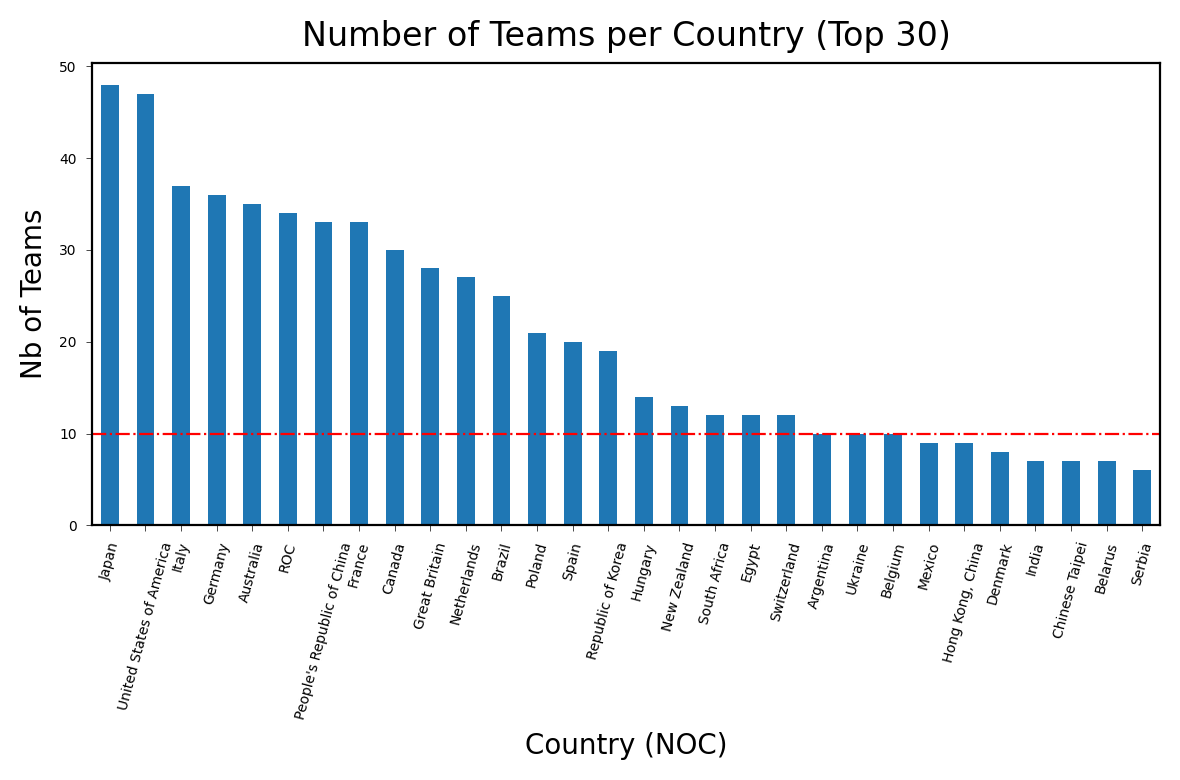

In [13]:
# take the 30 firsts elements for viz
df_top_15_teams_counts = df_team_counts.head(30)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# bar
g = df_top_15_teams_counts.plot(x='NOC', y='team_count', kind='bar', ax=ax, legend=False)

# Add a horizontal line
plt.axhline(y=10, color='r', linestyle='-.', linewidth=0.8)

# rotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_xlabel('Country (NOC)')
g.set_ylabel('Nb of Teams')
plt.title('Number of Teams per Country (Top 30)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

Only 22 countries are represented with more than 10 teams

China is represented with People's Republic of China and Hong Kong, China probably due to intern conflict

The used name for Taiwan is Chinese Taipei as China refuse to recognize Taiwan as a state.

### Athletes

In [14]:
df_athletes.info()
print('------------------------------------------')
display(df_athletes.describe().T)
df_athletes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
------------------------------------------


,count,unique,top,freq
Name,11085,11062,CHEN Yang,2
NOC,11085,206,United States of America,615
Discipline,11085,46,Athletics,2068


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


#### **Number of athletes per country**

In [15]:
# drop useless field
df_athletes.drop(columns=['Name'])

# count athletes
df_athletes_country = df_athletes.groupby(['NOC']).size().reset_index(name='Athletes_count').sort_values(by=['Athletes_count'], ascending=False)
df_athletes_country

,NOC,Athletes_count
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
...,...,...
173,South Sudan,2
36,Central African Republic,2
157,Saint Kitts and Nevis,2
176,St Vincent and the Grenadines,2


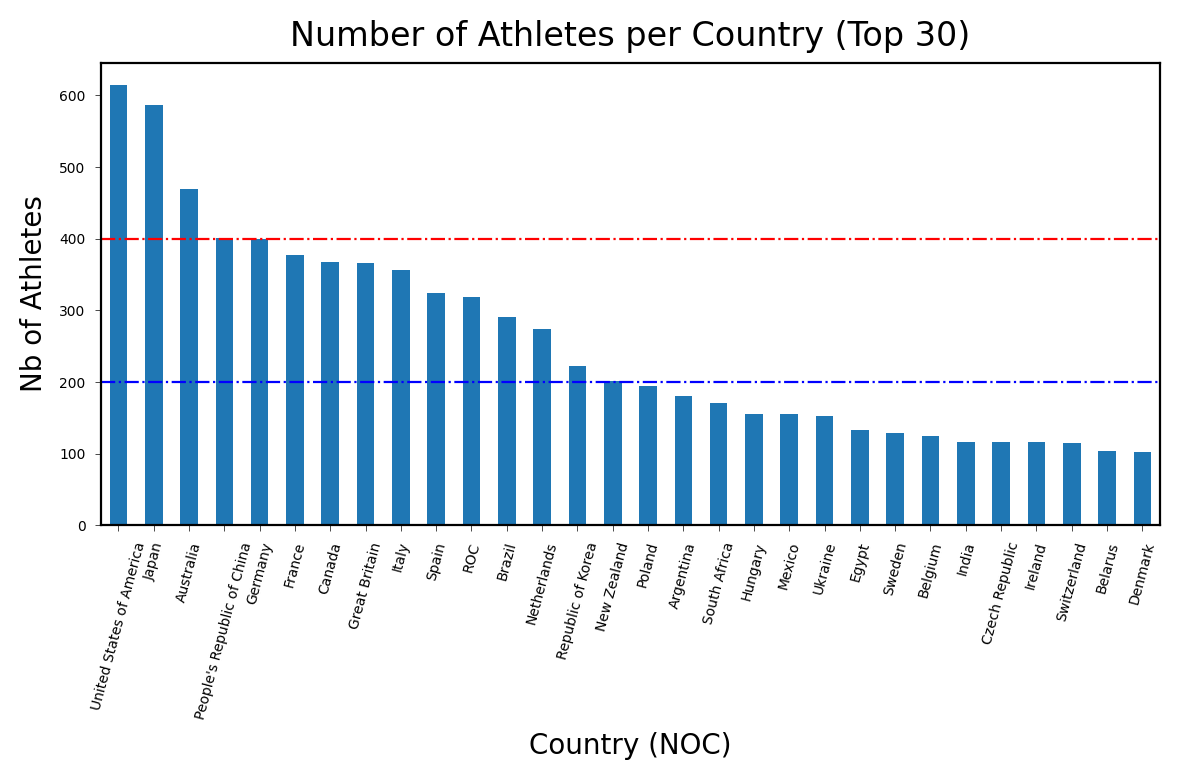

In [16]:
# take only the top 30 countries with the most athletes
df_top_30_athletes_country = df_athletes_country.head(30)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# bar
g = df_top_30_athletes_country.plot(x='NOC', y='Athletes_count', kind='bar', ax=ax, legend=False)

# Add a horizontal lines
plt.axhline(y=400, color='r', linestyle='-.', linewidth=0.8)
plt.axhline(y=200, color='b', linestyle='-.', linewidth=0.8)

# rotate discipline labels for better readability
g.tick_params(labelsize=5, width=0.25, length=2)
plt.xticks(rotation=75)

# set axis labels and title
g.set_xlabel('Country (NOC)')
g.set_ylabel('Nb of Athletes')
# set title and legend
plt.title('Number of Athletes per Country (Top 30)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

Only 5 countries have `400` athletes or more, and only 15 country are over `200` athletes.

The 3 countries with the most athletes are United State `615`, Japon `586` and Autralia `470`

#### **Number of athletes per discipline**

In [17]:
# count athletes
df_athletes_country = df_athletes.groupby(['Discipline']).size().reset_index(name='Athletes_count').sort_values(by=['Athletes_count'], ascending=False)
df_athletes_country.head(10)

,Discipline,Athletes_count
4,Athletics,2068
36,Swimming,743
20,Football,567
29,Rowing,496
23,Hockey,406
24,Judo,373
22,Handball,343
32,Shooting,342
31,Sailing,336
30,Rugby Sevens,283


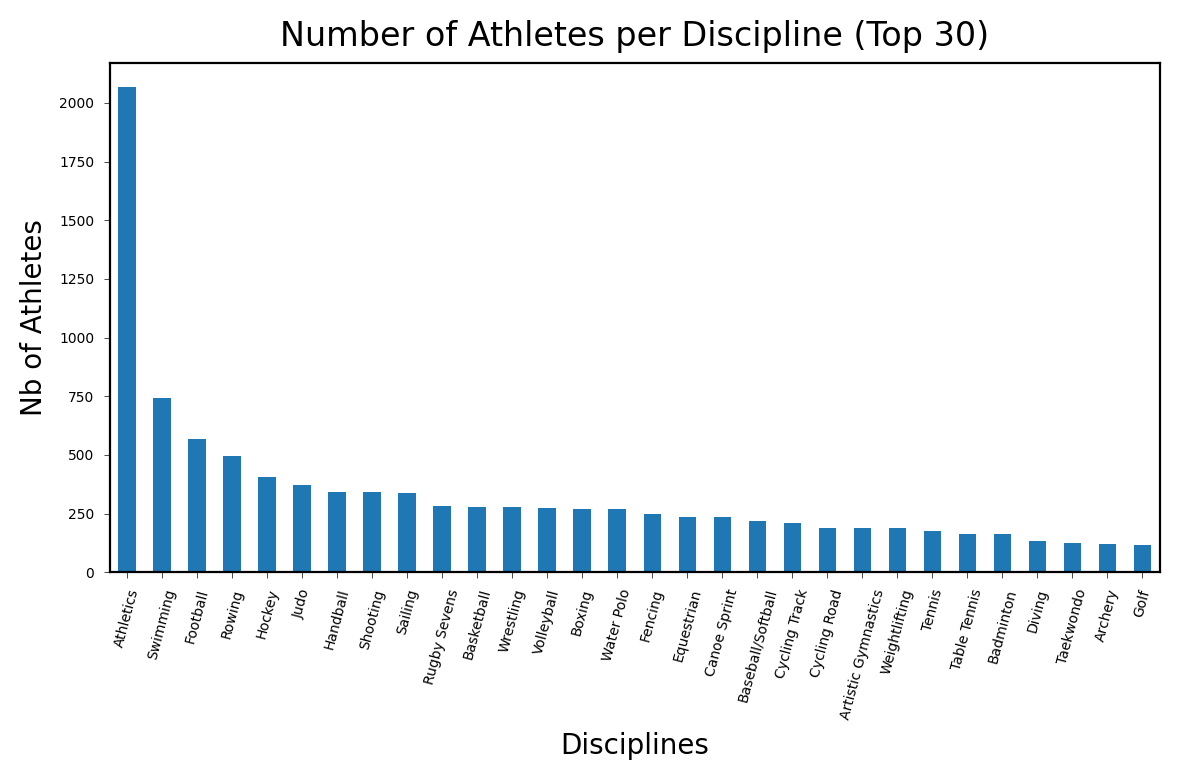

In [18]:
# take only the top 30 countries with the most athletes
df_top_30_athletes_country = df_athletes_country.head(30)

# bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Create the bar plot
g = df_top_30_athletes_country.plot(x='Discipline', y='Athletes_count', kind='bar', ax=ax, legend=False)



# rotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_xlabel('Disciplines')
g.set_ylabel('Nb of Athletes')
# set title and legend
plt.title('Number of Athletes per Discipline (Top 30)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

The disciplines with the most athletes are Athlectics by far `2068`, swimming `743`, football `567` and rowing `496`

### Coaches

In [19]:
df_coaches.info()
print('------------------------------------------')
display(df_coaches.describe().T)
df_coaches

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        394 non-null    object
 1   NOC         394 non-null    object
 2   Discipline  394 non-null    object
 3   Event       249 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB
------------------------------------------


,count,unique,top,freq
Name,394,381,REQUENA PERICAS Judit,2
NOC,394,61,Japan,35
Discipline,394,9,Basketball,74
Event,249,6,Men,94


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN


There is missing values on *event* column, we just ignore it for now as we focus on countries and disciplines

#### **Number of coaches per country**

In [20]:
# get nb coaches per country
df_coaches.drop(columns=['Name'])
df_coaches_country = df_coaches.groupby(['NOC']).size().reset_index(name='Coaches_count').sort_values(by=['Coaches_count'], ascending=False)
display(df_coaches_country.head())

# get nb coaches per disciplines
df_coaches.drop(columns=['Name'])
df_coaches_discipline = df_coaches.groupby(['Discipline']).size().reset_index(name='Coaches_count').sort_values(by=['Coaches_count'], ascending=False)
df_coaches_discipline.head(10)

,NOC,Coaches_count
30,Japan,35
58,United States of America,28
53,Spain,28
2,Australia,22
9,Canada,16


,Discipline,Coaches_count
2,Basketball,74
0,Artistic Swimming,69
3,Football,59
5,Hockey,45
7,Volleyball,45
4,Handball,29
1,Baseball/Softball,26
6,Rugby Sevens,25
8,Water Polo,22


We can see that only the coaches for team sport have been reported in the dataset


In [21]:
# take only the top 30 countries with the most athletes
df_top_30_coaches_country = df_coaches_country.head(30)

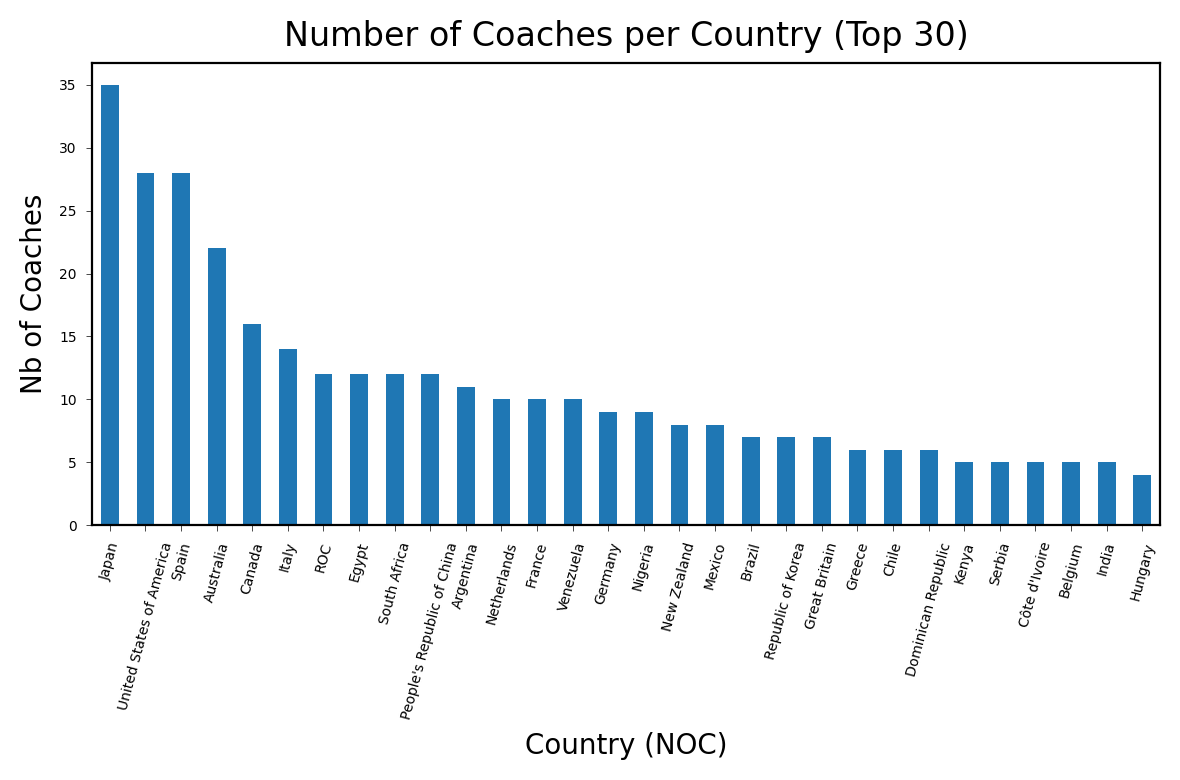

In [22]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# bar
g = df_top_30_coaches_country.plot(x='NOC', y='Coaches_count', kind='bar', ax=ax, legend=False)

# rotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_xlabel('Country (NOC)')
g.set_ylabel('Nb of Coaches')
# set title and legend
plt.title('Number of Coaches per Country (Top 30)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

The 3 countries with most coaches (US, Japan, Australia) also have a lot of coaches with seems logical.

#### **Number of coaches per discipline**

In [23]:
# take only the top 30 disciplines with the most athletes
df_top_30_coaches_discipline = df_coaches_discipline.head(30)

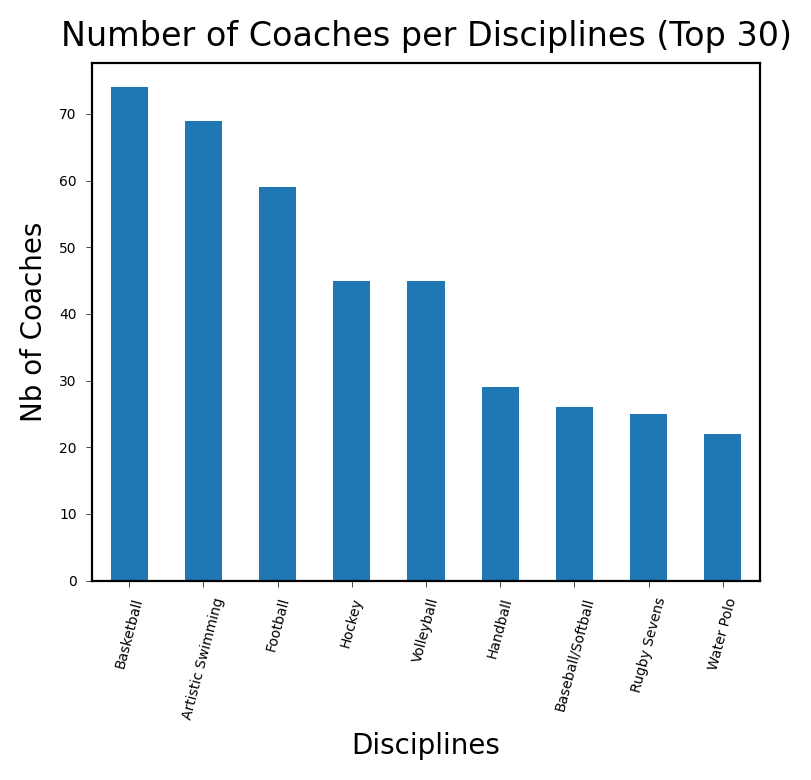

In [24]:
# Create the bar plot

fig, ax = plt.subplots(figsize=(4, 4))

# bar
g = df_top_30_coaches_discipline.plot(x='Discipline', y='Coaches_count', kind='bar', ax=ax, legend=False)

# sotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_xlabel('Disciplines')
g.set_ylabel('Nb of Coaches')
# set title and legend
plt.title('Number of Coaches per Disciplines (Top 30)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

Disciplines with the highest number of coaches are Basketball, Artistic Swimming and Football.

### Medals

In [25]:
df_medals.info()
print('------------------------------------------')
display(df_medals.describe().T)
df_medals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB
------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Rank,93.0,46.333333,26.219116,1.0,24.0,46.0,70.0,86.0
Gold,93.0,3.655914,7.022471,0.0,0.0,1.0,3.0,39.0
Silver,93.0,3.634409,6.626339,0.0,0.0,1.0,4.0,41.0
Bronze,93.0,4.322581,6.210372,0.0,1.0,2.0,5.0,33.0
Total,93.0,11.612903,19.091332,1.0,2.0,4.0,11.0,113.0
Rank by Total,93.0,43.494624,24.171769,1.0,23.0,47.0,66.0,77.0


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


#### **Country ranking by number of medals**

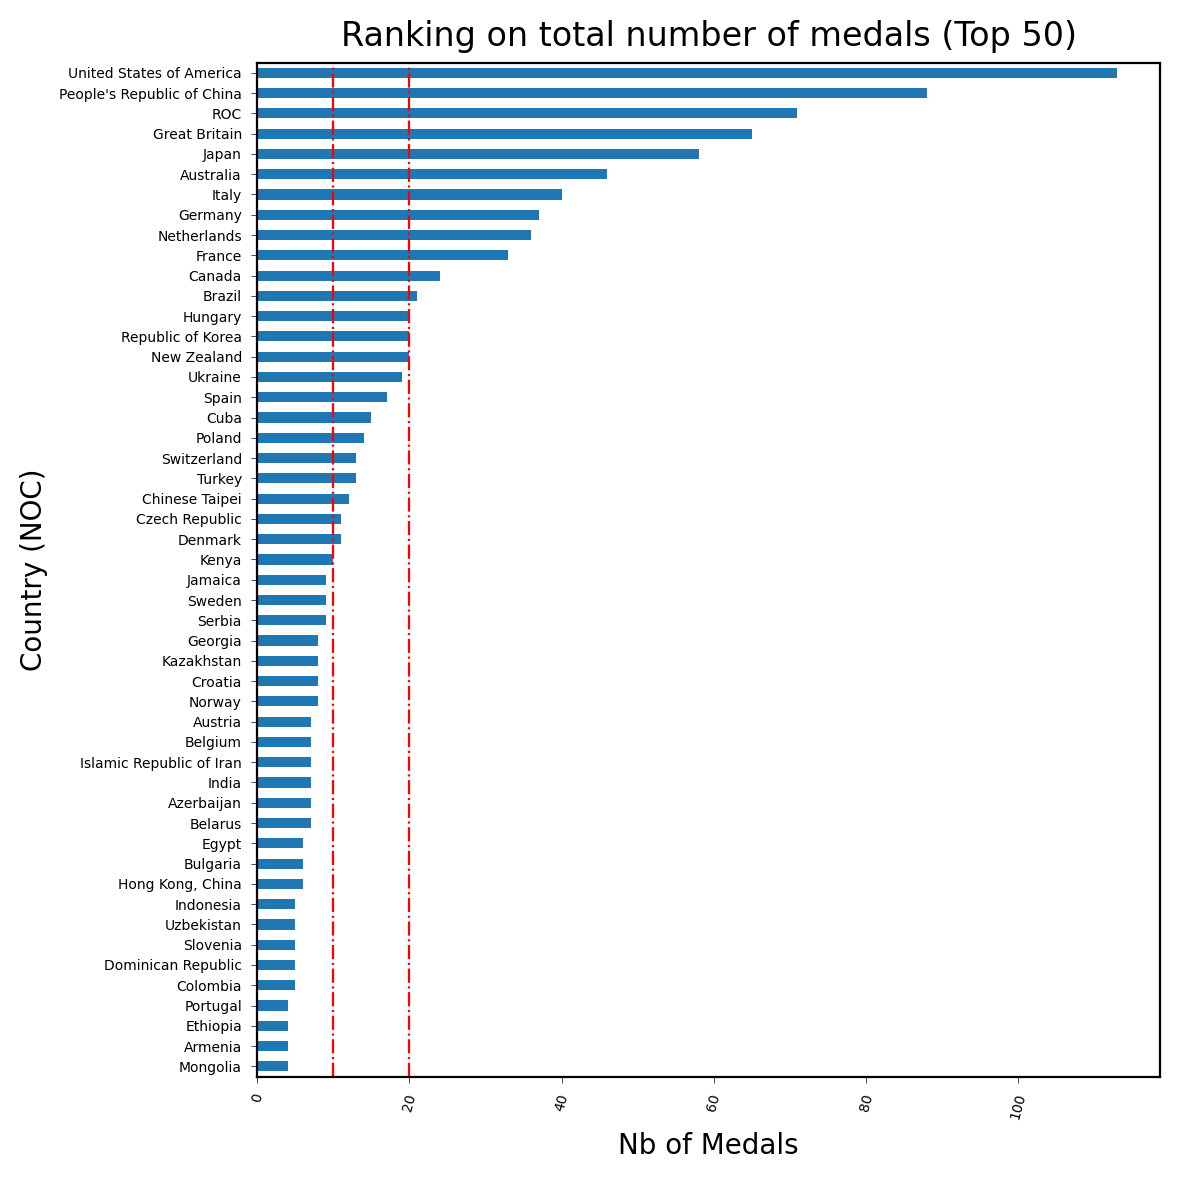

In [26]:
# sort on Total number of medals
df_medals.sort_values(by=['Total'], ascending=False, inplace=True)
# get the 50 first country
medals_count_top_50_country = df_medals.head(50)
# reverse df to show best in top
medals_count_top_50_country = medals_count_top_50_country[::-1]

# bar plot ranking on Total number of medals 
fig, ax = plt.subplots(figsize=(6, 6))

# bar
g = medals_count_top_50_country.plot(x='Team/NOC', y='Total', kind='barh', ax=ax, legend=False)

# Add a horizontal line at y=20
plt.axvline(x=20, color='r', linestyle='-.', linewidth=0.8)
plt.axvline(x=10, color='r', linestyle='-.', linewidth=0.8)

# rotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_ylabel('Country (NOC)')
g.set_xlabel('Nb of Medals')
# set title and legend
plt.title('Ranking on total number of medals (Top 50)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

15 countries have 20 medals or more and 25 countries have 10 medals or more.

#### **JO Official ranking (gold medals ranking)**

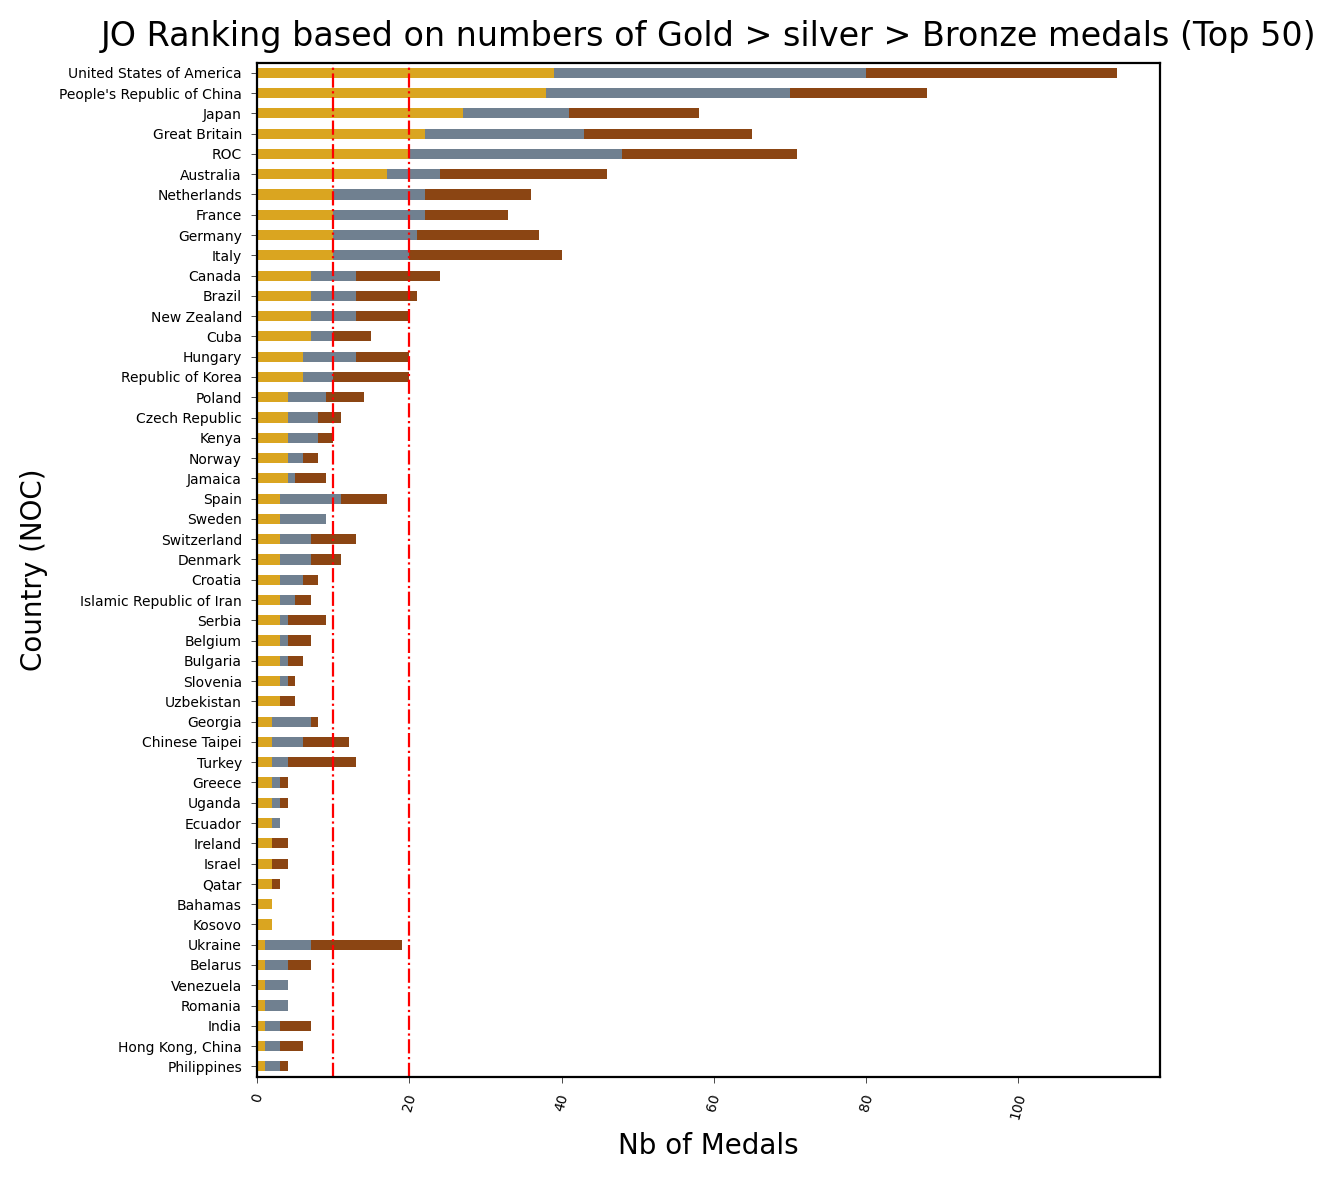

In [27]:
# sort on Total number of Gold medals, silver medals and bronze
df_medals['silver_n_bronze'] = df_medals['Total'] - df_medals['Gold']
df_medals.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=[False, False, False], inplace=True)
# get the 50 first country
medals_count_top_50_country = df_medals.head(50)
# reverse df to show us in top
medals_count_top_50_country = medals_count_top_50_country[::-1]

# bar plot ranking on Total number of medals 
fig, ax = plt.subplots(figsize=(6, 6))

# bar
g = medals_count_top_50_country.plot(x='Team/NOC', y=['Gold', 'Silver', 'Bronze'], stacked=True, kind='barh', ax=ax, legend=False, color=['goldenrod', 'slategray', 'saddlebrown'])

# Add a horizontal line at y=20
plt.axvline(x=20, color='r', linestyle='-.', linewidth=0.8)
plt.axvline(x=10, color='r', linestyle='-.', linewidth=0.8)

# rotate discipline labels for better readability
plt.xticks(rotation=75)
g.tick_params(labelsize=5, width=0.25, length=2)

# set axis labels and title
g.set_ylabel('Country (NOC)')
g.set_xlabel('Nb of Medals')
# set title and legend
plt.title('JO Ranking based on numbers of Gold > silver > Bronze medals (Top 50)')

# add legend
g.legend().set_visible(False)

plt.tight_layout()

plt.show()

Some countries are better ranked in Total numer fo medals than by medals values

It looks like there is a logical trend: countries with more athletes and coaches tend to have more medals.


___
***If you found this notebook helpful, please consider upvoting it!***